In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

In [2]:
mensual = []

for i in range(1517461200, 1519837201, 43200):

    name = "Atm_" + str(i)
    #print(name)
    
    cnt = 0
    param = np.zeros((4,5))
    
    with open("febrero/" + name + ".dat", "r") as file:
        for line in file:
            if line[0] != "#" and cnt <= 3:
 
                param[cnt,:] = line.split()
                cnt = cnt + 1
                
    lay0 = param[0,0]
    lay1 = param[0,1]
    lay2 = param[0,2]
    lay3 = param[0,3]
    lay4 = param[0,4]

    #capa 1
    a1 = param[1,0]
    b1 = param[2,0]
    c1 = param[3,0]
    #capa 2
    a2 = param[1,1]
    b2 = param[2,1]
    c2 = param[3,1]
    #capa 3
    a3 = param[1,2]
    b3 = param[2,2]
    c3 = param[3,2]
    #capa 4
    a4 = param[1,3]
    b4 = param[2,3]
    c4 = param[3,3]
    #capa 5
    a5 = param[1,4]
    b5 = param[2,4]
    c5 = param[3,4]
    
    h1 = np.linspace(lay0, lay1, 100)
    h2 = np.linspace(lay1, lay2, 100)
    h3 = np.linspace(lay2, lay3, 100)
    h4 = np.linspace(lay3, lay4, 100)
    h5 = np.linspace(lay4, 11200000, 100)

    
    d1 = a1+b1*np.exp(-h1/c1)
    d2 = a2+b2*np.exp(-h2/c2)
    d3 = a3+b3*np.exp(-h3/c3)
    d4 = a4+b4*np.exp(-h4/c4)
    d5 = a5-b5*(h5 / c5)
    
    H=np.concatenate((h1,h2,h3,h4,h5), axis=0)
    D=np.concatenate((d1,d2,d3,d4,d5), axis=0)
    
    mensual.append(D)
    
print(param)

[[  0.00000000e+00   3.77295538e+05   9.70745785e+05   2.62677915e+06
    1.00000000e+07]
 [ -2.01215261e+02  -8.82351105e+01  -3.89303956e+00   5.47018056e-04
    1.12829200e-02]
 [  1.25328538e+03   1.15013092e+03   1.18633240e+03   1.57490228e+03
    1.00000000e+00]
 [  1.09709980e+06   9.57606501e+05   7.64081317e+05   6.86042229e+05
    1.00000000e+09]]


In [3]:
nh = len(mensual)
mensual = np.asarray(mensual)
nh

56

In [4]:
febrero = np.asarray(mensual)
febrero = np.mean(febrero, axis = 0)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.


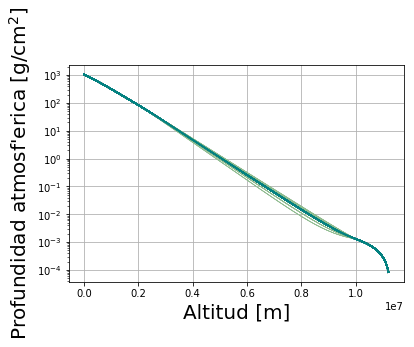

In [7]:
plt.figure()

for i in range(nh):
    plt.hold(True)
    plt.semilogy(H, mensual[i,:], color = 'darkseagreen', lw=0.5)
    #plt.semilogy(H, mensual[i,:], color = 'darkseagreen', lw=0.5)
    plt.plot(H, febrero, color = 'teal')

#scale_x = 100
#scale_y = 1e3
plt.xlabel("Altitud [m]", fontsize=20)
plt.ylabel("Profundidad atmosf\'erica [g/cm$^2$]", fontsize=20)
plt.grid()
plt.savefig('promedio_febrero.pdf')
plt.savefig('promedio_febrero.png', format='png', dpi=600)
plt.savefig('promedio_febrero.eps', format='eps', dpi=600)
plt.show()